In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import mutual_info_classif,SelectKBest,chi2,f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('data/cardio_train.csv',sep=';')
df['age'] = (df['age'] / 365.25).round().astype(int)
(df<0).any().any()

np.True_

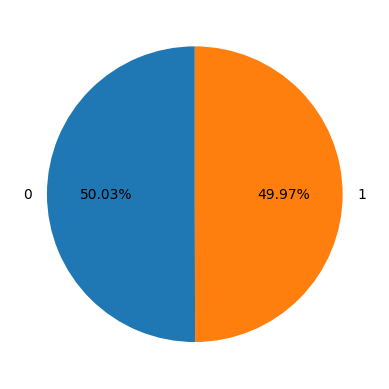

In [3]:
df['cardio'].value_counts().plot(kind='pie',labels=df['cardio'].value_counts().index,startangle=90,autopct='%1.2f%%')
plt.ylabel('')
plt.show()

In [4]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
x=df.drop(['cardio','id'],axis=1)
y=df['cardio']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# selector=SelectKBest(mutual_info_classif,k=5)
# x_train=selector.fit_transform(x_train,y_train)
# x_test=selector.transform(x_test)
# scaler=MinMaxScaler()
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.transform(x_test)
# selector=SelectKBest(score_func=chi2,k=5)
# x_train=selector.fit_transform(x_train,y_train)
# x_test=selector.transform(x_test)
# selector=SelectKBest(f_classif,k=8)       # All works
# x_train=selector.fit_transform(x_train,y_train)
# x_test=selector.transform(x_test)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
from joblib import dump
dump(scaler,"heart_scaler.joblib")

['heart_scaler.joblib']

Accuracy score: 0.6728571428571428
Confusion matrix:
 [[4880 2108]
 [2472 4540]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68      6988
           1       0.68      0.65      0.66      7012

    accuracy                           0.67     14000
   macro avg       0.67      0.67      0.67     14000
weighted avg       0.67      0.67      0.67     14000



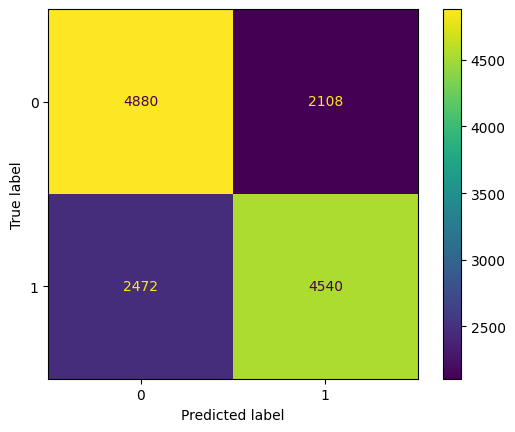

In [6]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))
dis=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
dis.plot()
plt.show()

Accuracy score: 0.7339285714285714
Confusion matrix:
 [[5785 1203]
 [2522 4490]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76      6988
           1       0.79      0.64      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



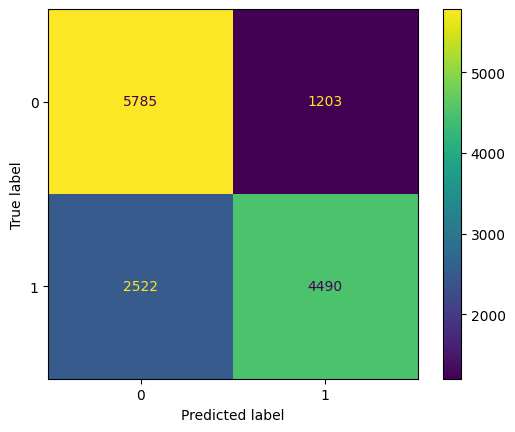

In [7]:
t=DecisionTreeClassifier(criterion='entropy',max_depth=5)
t.fit(x_train,y_train)
y_pred=t.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))
dis=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
dis.plot()
plt.show()

Accuracy score: 0.7031428571428572
Confusion matrix:
 [[4950 2038]
 [2118 4894]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      6988
           1       0.71      0.70      0.70      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



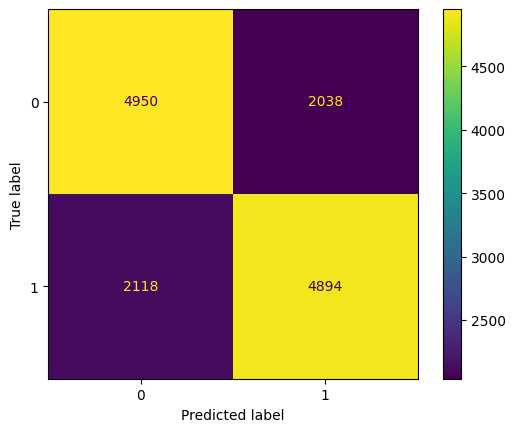

In [8]:
rf=RandomForestClassifier(n_estimators=80)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))
dis=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
dis.plot()
plt.show()

Accuracy score: 0.5937857142857143
Confusion matrix:
 [[6086  902]
 [4785 2227]]
Classification report:
               precision    recall  f1-score   support

           0       0.56      0.87      0.68      6988
           1       0.71      0.32      0.44      7012

    accuracy                           0.59     14000
   macro avg       0.64      0.59      0.56     14000
weighted avg       0.64      0.59      0.56     14000



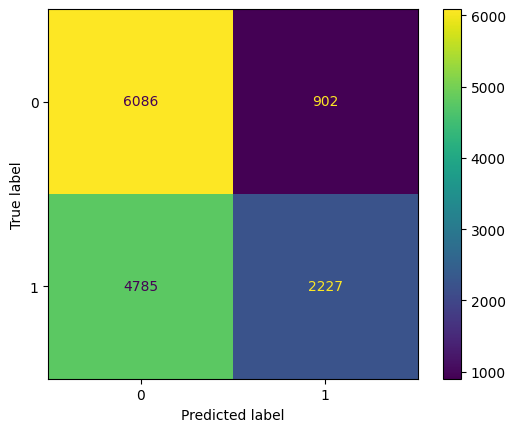

In [9]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))
dis=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
dis.plot()
plt.show()

Accuracy score: 0.7224285714285714
Confusion matrix:
 [[5350 1638]
 [2248 4764]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



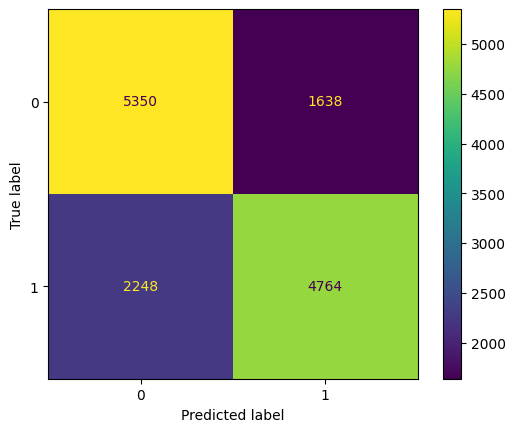

In [10]:
lr=LogisticRegression(max_iter=400)
lr.fit(x_train,y_train)
from joblib import dump
dump(lr,"heart_disease_model2.joblib",compress=3)
y_pred=lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))
dis=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
dis.plot()
plt.show()

In [ ]:
svc=SVC(kernel='rbf',probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))
dis=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
dis.plot()
plt.show()

In [ ]:
# Hard voting-o/p is what majority of models choose
hard_vote=VotingClassifier(estimators=[('knn',knn),('svc',svc),('t',t),('rf',rf),('lr',lr),('nb',gnb)],voting='hard')
hard_vote.fit(x_train,y_train)
hard_predict=hard_vote.predict(x_test)
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Hard voting accuracy=",accuracy_score(y_test,hard_predict))

Confusion matrix:
 [[5318 1670]
 [2093 4919]]
Hard voting accuracy= 0.7242142857142857


In [ ]:
# Soft voting-Each model gives class probabilities. These are averaged, and the class with the highest average is chosen.
soft_vote=VotingClassifier(estimators=[('rf',rf),('lr',lr),('nb',gnb)],voting='soft')
soft_vote.fit(x_train,y_train)
from joblib import dump
dump(soft_vote,"heart_disease_model.joblib",compress=3)
soft_predict=soft_vote.predict(x_test)
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Soft voting accuracy=",accuracy_score(y_test,soft_predict))

Confusion matrix:
 [[5350 1638]
 [2248 4764]]
Soft voting accuracy= 0.7040714285714286
